#### Regression - Predicting continuous values

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_samples=5000,n_features=30,n_informative=25,noise=10,random_state=42)

In [3]:
X

array([[-1.05245683, -0.94496269, -1.79989659, ..., -1.83442393,
        -0.07956011,  1.20745263],
       [-0.84747383,  0.31840811,  0.24796167, ..., -0.2390554 ,
        -0.69763862,  1.31984005],
       [-0.94602775,  0.2383774 , -1.6176638 , ..., -0.09142036,
        -0.74652074, -2.21823553],
       ...,
       [-0.22097737,  1.14453288, -0.39354952, ..., -0.90184457,
        -0.07424546, -0.2463316 ],
       [-0.95614616,  0.03256098, -1.12885675, ..., -0.00963513,
        -1.43734832,  0.63541106],
       [ 1.51114116, -0.00270833, -1.26097476, ..., -0.15650465,
         0.50981791,  1.19398227]])

In [4]:
Y

array([-232.93639282, -144.45063306,  -30.67109763, ...,  143.2968639 ,
       -248.32988778,  -19.83229819])

In [5]:
X.shape

(5000, 30)

#### Create list of columns

In [6]:
cols = [f'x{i+1}' for i in range(30)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30']

In [7]:
import pandas as pd
X = pd.DataFrame(X,columns=cols)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.052457,-0.944963,-1.799897,-0.034799,-1.482409,1.613543,-0.748163,-0.645310,1.063117,-1.335465,...,-0.398323,0.326932,2.042239,-0.301699,-1.361063,1.454857,-0.066823,-1.834424,-0.079560,1.207453
1,-0.847474,0.318408,0.247962,0.176165,0.550274,-0.695864,0.599538,-0.050914,1.363157,-1.201647,...,-1.368967,-0.403174,0.125837,-1.231097,-0.042579,-0.293594,-0.505876,-0.239055,-0.697639,1.319840
2,-0.946028,0.238377,-1.617664,-2.253756,-1.057629,-0.011553,1.400647,0.990803,-0.262228,-0.396235,...,-0.400736,0.007432,0.219753,2.205187,0.746020,-0.175596,-1.132978,-0.091420,-0.746521,-2.218236
3,-0.365222,0.004347,1.459301,1.650519,-3.114990,0.718841,1.669763,0.594568,0.350614,-0.528732,...,0.587610,0.050495,0.692244,0.492412,-0.118160,0.151945,-0.299890,1.009559,-0.779756,1.105541
4,-0.937119,0.038862,0.267291,-2.321520,-0.519995,1.281711,-0.447109,1.847404,-0.179080,0.073799,...,-0.985717,0.734585,-0.870311,0.316585,0.373045,-0.594102,-1.388615,1.262913,-0.668793,-0.049186


In [8]:
Y = pd.DataFrame(Y,columns=['Y'])
Y

,Y
0,-232.936393
1,-144.450633
2,-30.671098
3,165.764197
4,-252.068764
...,...
4995,337.924300
4996,587.266360
4997,143.296864
4998,-248.329888


##### Creating preprocessing pipeline for X

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [10]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-1.00877542, -0.96849615, -1.8356222 , ..., -1.84743596,
        -0.06441693,  1.19633814],
       [-0.80656544,  0.30321775,  0.22782616, ..., -0.25077076,
        -0.67948802,  1.30863615],
       [-0.90378611,  0.22265853, -1.6520021 , ..., -0.10301574,
        -0.72813229, -2.22662492],
       ...,
       [-0.1885443 ,  1.13479811, -0.41856878, ..., -0.91409862,
        -0.05912814, -0.25628963],
       [-0.91376764,  0.01548293, -1.15947382, ..., -0.02116403,
        -1.41559849,  0.62475162],
       [ 1.52014196, -0.02001929, -1.29259762, ..., -0.16815292,
         0.52209333,  1.18287849]])

In [12]:
cols = num_pipe.get_feature_names_out()
cols

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30'], dtype=object)

In [13]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.008775,-0.968496,-1.835622,-0.032196,-1.485420,1.614947,-0.747164,-0.627734,1.038359,-1.340893,...,-0.418507,0.322752,2.071710,-0.324901,-1.342910,1.406812,-0.052268,-1.847436,-0.064417,1.196338
1,-0.806565,0.303218,0.227826,0.179320,0.577043,-0.684461,0.585446,-0.053781,1.334905,-1.205877,...,-1.393646,-0.402106,0.132047,-1.271369,-0.027103,-0.319448,-0.496045,-0.250771,-0.679488,1.308636
2,-0.903786,0.222659,-1.652002,-2.256956,-1.054417,-0.003112,1.377584,0.952108,-0.271556,-0.393252,...,-0.420931,0.005548,0.227103,2.228029,0.759895,-0.202948,-1.129894,-0.103016,-0.728132,-2.226625
3,-0.330838,-0.012918,1.448387,1.657530,-3.141920,0.724120,1.643688,0.569500,0.334151,-0.526935,...,0.571991,0.048302,0.705328,0.483796,-0.102530,0.120436,-0.287843,0.998859,-0.761205,1.094508
4,-0.894998,0.021825,0.247303,-2.324897,-0.508906,1.284552,-0.449481,1.779248,-0.189376,0.080993,...,-1.008621,0.727476,-0.876193,0.304739,0.387677,-0.616143,-1.388281,1.252419,-0.650783,-0.059300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.965842,0.420583,0.734947,-1.514086,0.304967,-2.336834,-0.456013,-0.356376,1.205003,-0.160276,...,-0.736890,0.536374,2.392774,-0.713436,0.032561,1.575132,0.532678,-1.382252,0.041823,0.357655
4996,-1.175178,-0.742758,2.448376,-0.274362,-1.183961,-1.176764,-0.818931,-0.279651,-0.708646,-0.089037,...,0.538165,2.487869,0.588627,-0.203426,0.857725,0.027006,0.225318,0.291553,0.475758,2.448978
4997,-0.188544,1.134798,-0.418569,0.251050,-0.925438,0.252138,-0.087032,1.416435,0.899063,-0.523322,...,0.044664,0.748936,2.188386,1.117212,0.723564,-0.644151,-1.722917,-0.914099,-0.059128,-0.256290
4998,-0.913768,0.015483,-1.159474,-0.144324,-3.458484,-1.243817,-0.153816,-0.348422,-1.766771,-2.508537,...,-0.295007,-0.557099,-0.162878,1.758206,-0.222849,-0.827147,-0.523489,-0.021164,-1.415598,0.624752


#### Train Test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [15]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
4227,0.274306,-2.243030,0.307393,2.279325,-0.849919,-0.499417,0.063387,0.322236,-0.279113,-1.485297,...,-0.435550,0.016456,-0.478773,0.826978,0.348374,0.203044,-0.974020,1.133163,0.644459,1.026561
4676,-0.110889,-2.308274,-0.306657,-2.797217,0.744218,-1.215240,0.092720,-0.881949,0.099739,-0.153516,...,0.684150,-0.050237,0.659385,0.950390,-2.264741,-0.934321,-0.207092,-1.429908,0.477449,-0.143864
800,-0.534724,0.341340,-0.318392,1.233363,1.778518,0.298750,0.083038,0.104657,0.121582,1.150535,...,2.105502,0.100787,0.150310,0.796843,0.088543,1.044029,-0.691462,0.027791,-0.467562,1.088671
3671,-0.366200,1.081039,-0.920495,-1.060692,-0.616689,0.923926,1.178280,-2.049797,-0.133985,-1.437462,...,0.375930,0.799287,-1.524107,-0.213573,1.841831,-0.235666,-1.623648,0.003545,2.453793,-0.826658
4193,-0.834782,1.471498,-1.414701,-0.704299,2.131088,-0.208189,0.823199,0.547557,0.462746,-1.556602,...,-1.605144,0.394171,0.414800,0.015313,-1.559552,0.776827,-1.919909,1.235952,-1.425568,0.749621


In [16]:
xtrain.shape

(4000, 30)

In [18]:
xtest.shape

(1000, 30)

In [46]:
xtrain.shape[1]

30

: 

#### Create Deep learning Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# Initialize sequential layer
model = Sequential()

# Hidden Layer 1
model.add(Dense(64,activation='relu',input_dim=xtrain.shape[1]))

# Hindden Layer 2
model.add(Dense(32,activation='relu'))

# Output Layer
model.add(Dense(1,activation='linear'))


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1984      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [25]:
hist = model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 3ms/step - loss: 67112.9141 - mae: 207.6302 - val_loss: 68861.1875 - val_mae: 209.1797
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 57612.2500 - mae: 191.2114 - val_loss: 47200.4844 - val_mae: 170.8568
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 25637.1016 - mae: 119.9387 - val_loss: 9497.0557 - val_mae: 69.6909
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 3051.2671 - mae: 37.7219 - val_loss: 1210.0352 - val_mae: 26.2402
Epoch 5/100
100/100 [==============================] - 0s 1ms/step - loss: 752.4199 - mae: 20.6398 - val_loss: 585.9992 - val_mae: 17.9527
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 454.7117 - mae: 16.3776 - val_loss: 458.3097 - val_mae: 16.4353
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 407.8090 - mae: 15.6672 - val_loss: 421.7257 - val_mae: 15.9065
Epoch 8/1

In [26]:
hist.history['loss']

[67112.9140625,
 57612.25,
 25637.1015625,
 3051.26708984375,
 752.419921875,
 454.71173095703125,
 407.80902099609375,
 382.9803771972656,
 363.4671936035156,
 345.2578430175781,
 327.7521057128906,
 309.05010986328125,
 291.8725280761719,
 274.642333984375,
 257.5701599121094,
 244.30328369140625,
 228.68873596191406,
 214.1714630126953,
 200.61915588378906,
 187.68289184570312,
 177.93580627441406,
 165.97103881835938,
 155.57228088378906,
 146.93856811523438,
 138.90985107421875,
 129.48605346679688,
 124.78018188476562,
 118.22578430175781,
 114.72616577148438,
 109.51160430908203,
 105.95723724365234,
 102.68174743652344,
 99.92198181152344,
 98.06560516357422,
 94.80684661865234,
 93.34664154052734,
 91.93303680419922,
 90.82813262939453,
 87.76217651367188,
 87.79035186767578,
 86.83686828613281,
 85.10167694091797,
 83.68148803710938,
 82.74040222167969,
 82.81086730957031,
 82.32019805908203,
 81.51537322998047,
 79.18888092041016,
 79.2978744506836,
 79.20983123779297,
 78.0

In [27]:
hist.history['val_loss']

[68861.1875,
 47200.484375,
 9497.0556640625,
 1210.03515625,
 585.9992065429688,
 458.3096923828125,
 421.7256774902344,
 399.6436767578125,
 388.158447265625,
 363.0960998535156,
 350.5120849609375,
 339.4703063964844,
 316.9140930175781,
 300.1054992675781,
 294.3774719238281,
 271.8851623535156,
 257.768798828125,
 244.11090087890625,
 238.2974395751953,
 222.20932006835938,
 215.47885131835938,
 202.6121826171875,
 194.10205078125,
 183.34046936035156,
 174.8860321044922,
 171.3886260986328,
 162.83432006835938,
 163.6746063232422,
 156.90103149414062,
 153.1092529296875,
 154.96908569335938,
 145.75367736816406,
 153.28273010253906,
 143.49569702148438,
 141.7653045654297,
 141.82562255859375,
 141.1820831298828,
 136.4903564453125,
 138.2548370361328,
 142.5124053955078,
 137.2086944580078,
 136.15158081054688,
 137.34197998046875,
 140.0525665283203,
 135.47943115234375,
 137.14920043945312,
 137.80397033691406,
 132.35743713378906,
 137.02981567382812,
 131.51226806640625,
 13

In [28]:
hist.history['mae']

[207.6301727294922,
 191.21136474609375,
 119.9386978149414,
 37.72191619873047,
 20.639806747436523,
 16.377634048461914,
 15.667150497436523,
 15.303340911865234,
 14.936376571655273,
 14.46509075164795,
 14.153939247131348,
 13.718501091003418,
 13.321738243103027,
 12.960821151733398,
 12.564945220947266,
 12.213229179382324,
 11.819591522216797,
 11.43465805053711,
 11.107203483581543,
 10.7230806350708,
 10.45307731628418,
 10.087002754211426,
 9.784675598144531,
 9.521646499633789,
 9.273523330688477,
 8.971393585205078,
 8.783583641052246,
 8.5819673538208,
 8.46921157836914,
 8.277329444885254,
 8.165884971618652,
 8.045764923095703,
 7.902683734893799,
 7.823953151702881,
 7.705488681793213,
 7.639846324920654,
 7.567762851715088,
 7.546805381774902,
 7.435089588165283,
 7.404483795166016,
 7.362512588500977,
 7.295010566711426,
 7.205763339996338,
 7.167366981506348,
 7.193302154541016,
 7.178408145904541,
 7.094353675842285,
 7.012449741363525,
 7.024259090423584,
 7.029368

In [29]:
hist.history['val_mae']

[209.1796875,
 170.8568115234375,
 69.6908950805664,
 26.240175247192383,
 17.952659606933594,
 16.435260772705078,
 15.906513214111328,
 15.507355690002441,
 15.081210136413574,
 14.873147010803223,
 14.47107219696045,
 14.233609199523926,
 14.007745742797852,
 13.547327041625977,
 13.156698226928711,
 12.862576484680176,
 12.663067817687988,
 12.252799987792969,
 12.002127647399902,
 11.738882064819336,
 11.470563888549805,
 11.208861351013184,
 10.969468116760254,
 10.719643592834473,
 10.469115257263184,
 10.3726224899292,
 10.132052421569824,
 10.1915922164917,
 10.040555000305176,
 9.882765769958496,
 9.84262466430664,
 9.773749351501465,
 9.846142768859863,
 9.589899063110352,
 9.636783599853516,
 9.61967658996582,
 9.551162719726562,
 9.407918930053711,
 9.533319473266602,
 9.507532119750977,
 9.367958068847656,
 9.447521209716797,
 9.428934097290039,
 9.497419357299805,
 9.348584175109863,
 9.39718246459961,
 9.394367218017578,
 9.257148742675781,
 9.322328567504883,
 9.248970

### Plot the linear curve

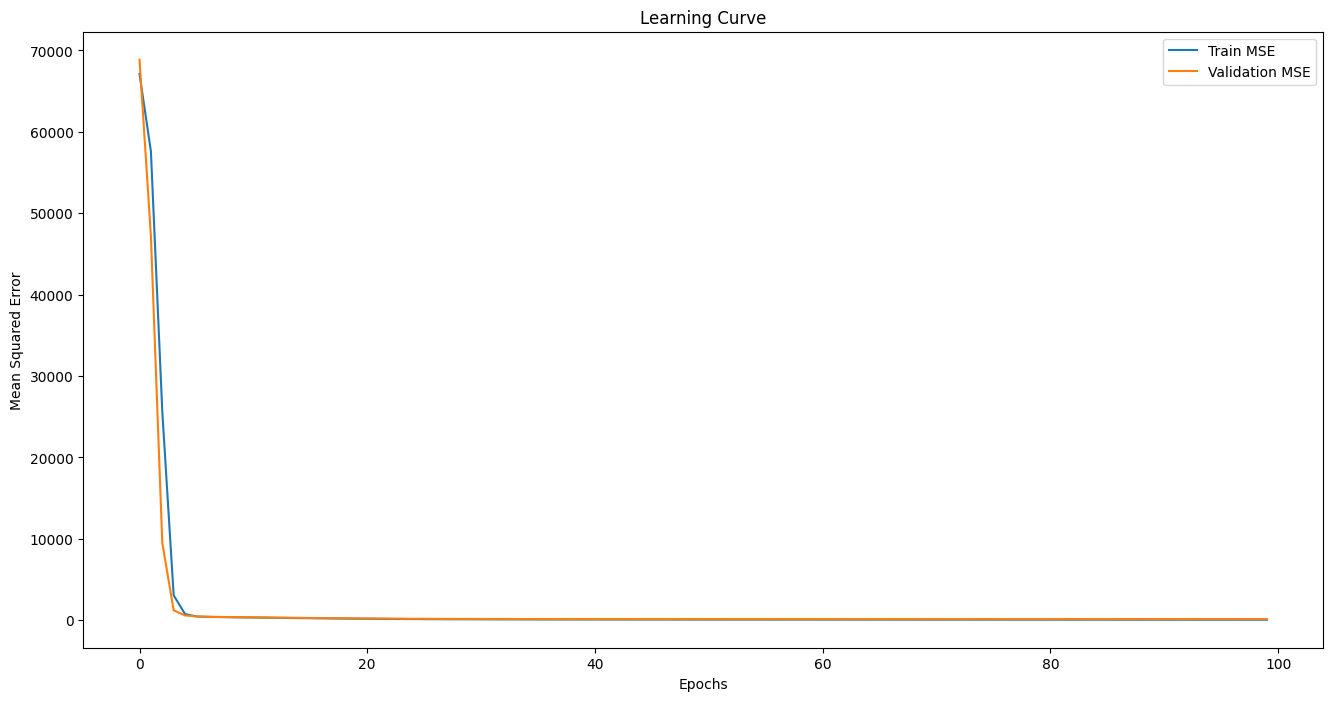

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Train MSE')
plt.plot(hist.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate model

In [31]:
model.evaluate(xtrain,ytrain)

125/125 [==============================] - 0s 850us/step - loss: 71.2774 - mae: 6.4992


[71.27740478515625, 6.499156951904297]

In [32]:
model.evaluate(xtest,ytest)

32/32 [==============================] - 0s 1ms/step - loss: 126.4054 - mae: 8.9246


[126.40544891357422, 8.924631118774414]

#### Predict train and test

In [33]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

32/32 [==============================] - 0s 683us/step


In [34]:
ypred_tr[:5]

array([[ 415.2992  ],
       [-458.74677 ],
       [  34.749863],
       [ 111.79266 ],
       [-213.42125 ]], dtype=float32)

In [36]:
ytrain.head()

,Y
4227,421.295025
4676,-469.452726
800,42.172815
3671,114.083914
4193,-217.535707


In [37]:
ypred_ts[:5]

array([[ 300.6152  ],
       [ -64.761246],
       [-178.28487 ],
       [ 230.43524 ],
       [ 189.05244 ]], dtype=float32)

In [38]:
ytest.head()

,Y
1501,297.782677
2586,-55.418700
2653,-181.896454
1055,210.251382
705,188.412050


### Check r2 score in train and test

In [39]:
from sklearn.metrics import r2_score
tr_r2 = r2_score(ytrain,ypred_tr)
tr_r2

0.9989595478542642

In [40]:
ts_r2 = r2_score(ytest,ypred_ts)
ts_r2

0.9982614612662158

#### Save the model for future

In [43]:
model.save('ExampleRegression.keras')

In [44]:
from keras.models import load_model
nn = load_model('ExampleRegression.keras')

In [45]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1984      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
